<a href="https://colab.research.google.com/github/laurenliz22/Predicting-Tree-Types/blob/master/Forest_Cover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Case" data-toc-modified-id="Business-Case-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Case</a></span></li><li><span><a href="#Data-Import-&amp;-EDA" data-toc-modified-id="Data-Import-&amp;-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Import &amp; EDA</a></span><ul class="toc-item"><li><span><a href="#Resample-Data" data-toc-modified-id="Resample-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Resample Data</a></span></li></ul></li><li><span><a href="#Feature-Engineering-&amp;-Modeling" data-toc-modified-id="Feature-Engineering-&amp;-Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering &amp; Modeling</a></span><ul class="toc-item"><li><span><a href="#Feature-engineering-and-selection-with-PCA" data-toc-modified-id="Feature-engineering-and-selection-with-PCA-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature engineering and selection with PCA</a></span></li><li><span><a href="#Train/Test-Split" data-toc-modified-id="Train/Test-Split-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train/Test Split</a></span></li><li><span><a href="#Baseline-Model---Random-Forest-Classifier-with-baseline-parameters" data-toc-modified-id="Baseline-Model---Random-Forest-Classifier-with-baseline-parameters-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Baseline Model - Random Forest Classifier with baseline parameters</a></span></li><li><span><a href="#Model-#1:-Random-Forest" data-toc-modified-id="Model-#1:-Random-Forest-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Model #1: Random Forest</a></span></li><li><span><a href="#Model-#2:-KNN" data-toc-modified-id="Model-#2:-KNN-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Model #2: KNN</a></span></li><li><span><a href="#Model-#3:-Adaboost" data-toc-modified-id="Model-#3:-Adaboost-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Model #3: Adaboost</a></span></li></ul></li><li><span><a href="#Return-to-Random-Forest" data-toc-modified-id="Return-to-Random-Forest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Return to Random Forest</a></span><ul class="toc-item"><li><span><a href="#Feature-engineering/selection---reduce-dimensionality" data-toc-modified-id="Feature-engineering/selection---reduce-dimensionality-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Feature engineering/selection - reduce dimensionality</a></span></li><li><span><a href="#Fit-Model" data-toc-modified-id="Fit-Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fit Model</a></span></li></ul></li><li><span><a href="#Final-Model-on-Test-Data" data-toc-modified-id="Final-Model-on-Test-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Final Model on Test Data</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Business Case

Aronson Consulting is looking into predicting tree types in the Roosevelt National Forest of Colorado for the purpose of understanding the Forest's landscape.  The dataset that is used contains tree observations from four wilderness areas of the Roosevelt National Forest.  This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography.  Based on these characteristics Aronson Consulting will develop a model to predict the type of trees that are growing. 

# Data Import

The first step to analyzing this data is to import it.  I've used google colab for this project and will import the drive needed to bring in my raw data file.

In [38]:
#import drive from google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#import libraries
import pandas as pd
import numpy as np
np.random.seed(0) #set the random seed
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import seaborn as sns
import math
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
from sklearn.feature_selection import SelectFromModel

In [3]:
#import data
data_raw = pd.read_csv('drive/My Drive/covtype.csv')
print(len(data_raw))
data_raw.head()

581012


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


There are 581,012 data records in the raw dataset

Background on Data: 

The study area includes four wilderness areas located in the Roosevelt National Forest of Colorado. Each observation is a 30m x 30m patch.

Target: 
Forest Cover Type (Cover_Type)
* 1 - Spruce/Fir
* 2 - Lodgepole Pine
* 3 - Ponderosa Pine
* 4 - Cottonwood/Willow
* 5 - Aspen
* 6 - Douglas-fir
* 7 - Krummholz

Features:
* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation

The wilderness areas are:
* 1 - Rawah Wilderness Area
* 2 - Neota Wilderness Area
* 3 - Comanche Peak Wilderness Area
* 4 - Cache la Poudre Wilderness Area

The soil types are:

* 1 Cathedral family - Rock outcrop complex, extremely stony.
* 2 Vanet - Ratake families complex, very stony.
* 3 Haploborolis - Rock outcrop complex, rubbly.
* 4 Ratake family - Rock outcrop complex, rubbly.
* 5 Vanet family - Rock outcrop complex complex, rubbly.
* 6 Vanet - Wetmore families - Rock outcrop complex, stony.
* 7 Gothic family.
* 8 Supervisor - Limber families complex.
* 9 Troutville family, very stony.
* 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
* 11 Bullwark - Catamount families - Rock land complex, rubbly.
* 12 Legault family - Rock land complex, stony.
* 13 Catamount family - Rock land - Bullwark family complex, rubbly.
* 14 Pachic Argiborolis - Aquolis complex.
* 15 unspecified in the USFS Soil and ELU Survey.
* 16 Cryaquolis - Cryoborolis complex.
* 17 Gateview family - Cryaquolis complex.
* 18 Rogert family, very stony.
* 19 Typic Cryaquolis - Borohemists complex.
* 20 Typic Cryaquepts - Typic Cryaquolls complex.
* 21 Typic Cryaquolls - Leighcan family, till substratum complex.
* 22 Leighcan family, till substratum, extremely bouldery.
* 23 Leighcan family, till substratum - Typic Cryaquolls complex.
* 24 Leighcan family, extremely stony.
* 25 Leighcan family, warm, extremely stony.
* 26 Granile - Catamount families complex, very stony.
* 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
* 28 Leighcan family - Rock outcrop complex, extremely stony.
* 29 Como - Legault families complex, extremely stony.
* 30 Como family - Rock land - Legault family complex, extremely stony.
* 31 Leighcan - Catamount families complex, extremely stony.
* 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
* 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
* 34 Cryorthents - Rock land complex, extremely stony.
* 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
* 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
* 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
* 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
* 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
* 40 Moran family - Cryorthents - Rock land complex, extremely stony.

Now that my data is imported, I'll start reviewing the dataset to determine if any cleaning needs to take place

# Explore Data

## Raw Data

In [4]:
#review dataset
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

All data types are integers and it does not appear there is any missing data.  However I'll explore this further.

In [5]:
#explore if there are any NaN values in the data
data_raw.isna().any().any()

False

There are no NaN values in the dataset.  Next I'll look at the different features included in my dataset

In [6]:
#review columns
data_raw.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

I'll also review the Target I'm trying to predict (Cover_Type) to see how many of each type are included in the full dataset

In [7]:
#review categorical data for classification
data_raw.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

It appears that there is large variation between the different cover types included in the raw dataset.  After reviewing the data a bit further, I'll resample to "even things out" before running my models.

Next I'll look at the distribution of my features using a histogram.

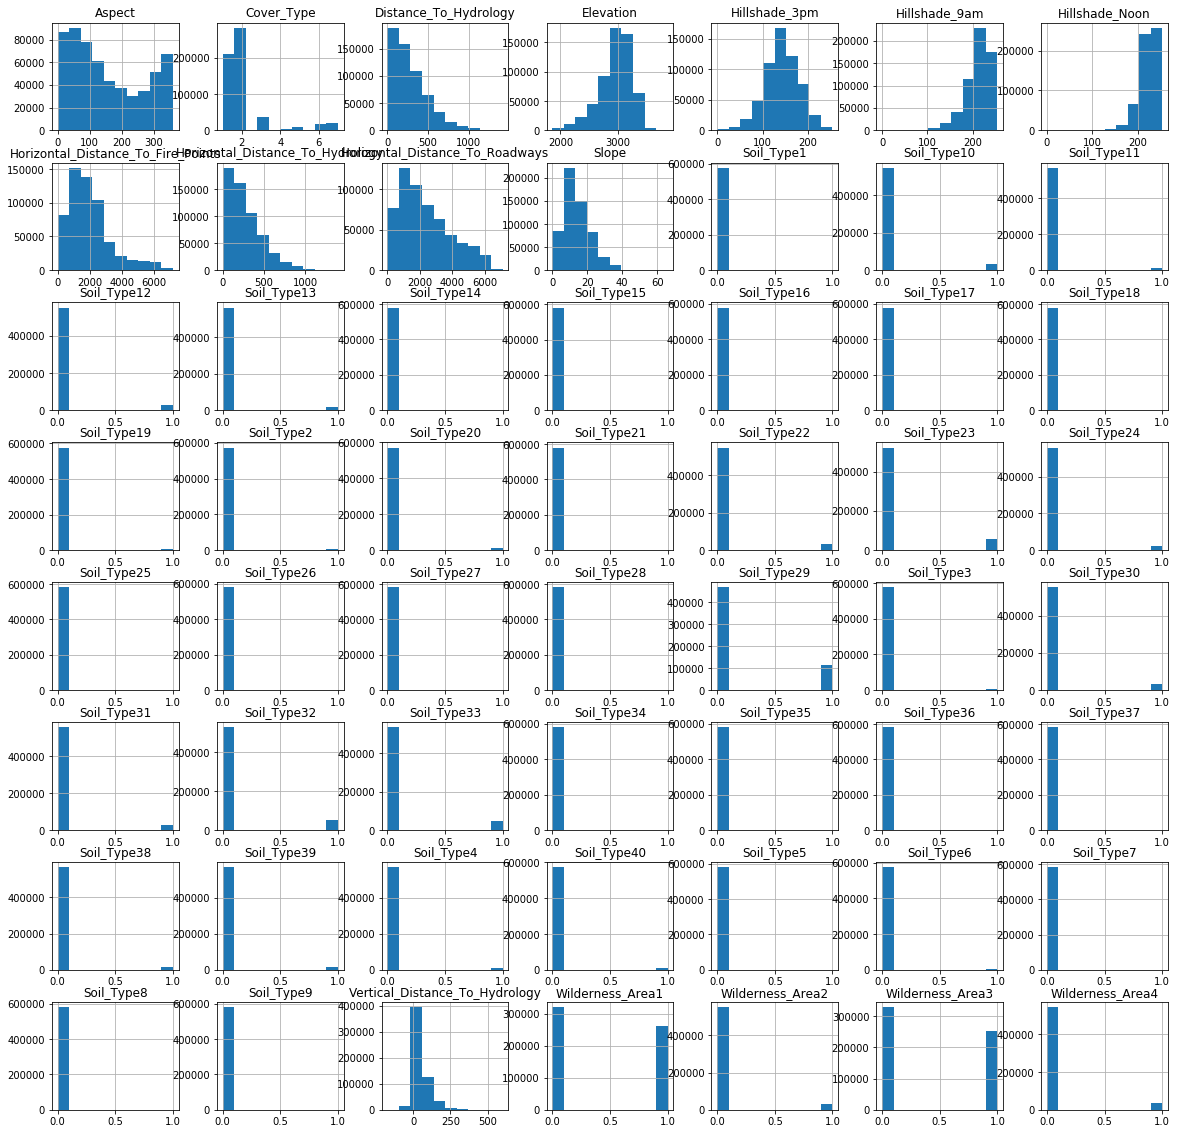

In [9]:
#look at distribution of data
data_raw.hist(figsize = (20,20));

- Wilderness area, soil type and cover_type are categorical data.
- Aspect, Distance to Hydrology (including vertical and horizontal), Elevation, Slope, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points are all continuous and are either right or left skewed, except for aspect.
- Aspect in degrees azimuth dips in the middle, which makes sense as it's a 360 degree measurement.  Azimuth relates to the direction the Sun is facing: North, South, East, or West. Azimuth of 90 degrees corresponds to East. 
- Hillshade_3pm (0-255 index) is actually closer to normalized when looking at the histogram plot showing a mean of around 150.

I'll look at the continuous data features a bit closer now and create a new dataset to do so.

In [10]:
#create new dataset for continuous features
cont_data = data_raw.loc[:,['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                        'Horizontal_Distance_To_Fire_Points']]
print(len(cont_data))
cont_data.head()

581012


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,258.000000,510,221,232,148,6279
1,2590,56,2,212,-6,212.084889,390,220,235,151,6225
2,2804,139,9,268,65,275.769832,3180,234,238,135,6121
3,2785,155,18,242,118,269.235956,3090,238,238,122,6211
4,2595,45,2,153,-1,153.003268,391,220,234,150,6172


Reviewing how features are correlated - checking for multicollinearity 

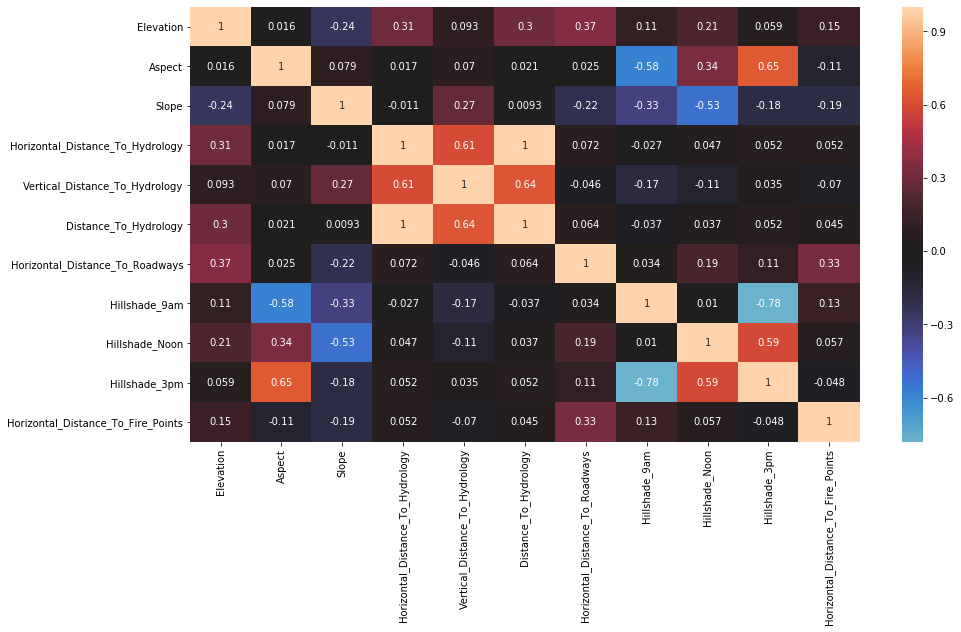

In [11]:
#create a heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(), center=0, annot=True)

Correlated features:
- Aspect and Hillshade_3pm
- Hillshade_Noon and Hillshade_3pm
- Horizontal_Distance_to_Hydrology and Vertical_Distance_to_Hydrology (makes sense)

## Resampled Data

Since there was such a large variation between the Cover_types I'll resample the dataset using upsampling and downsampling to make them equal.  I'll also resample so that my raw dataset of almost 600K will be reduced to 50K for ease of modeling.

In [0]:
#separate different classes
data_ct1 = data_raw[data_raw.Cover_Type == 1]
data_ct2 = data_raw[data_raw.Cover_Type == 2]
data_ct3 = data_raw[data_raw.Cover_Type == 3]
data_ct4 = data_raw[data_raw.Cover_Type == 4]
data_ct5 = data_raw[data_raw.Cover_Type == 5]
data_ct6 = data_raw[data_raw.Cover_Type == 6]
data_ct7 = data_raw[data_raw.Cover_Type == 7]

In [13]:
#resample data
n = math.ceil(50000 / 7)
data_ct1_downsample = resample(data_ct1, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct2_downsample = resample(data_ct2, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct3_downsample = resample(data_ct3, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct4_upsample = resample(data_ct4, 
                             replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct5_downsample = resample(data_ct5, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct6_downsample = resample(data_ct6, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct7_downsample = resample(data_ct7, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results

data_sampled = pd.concat([data_ct1_downsample, data_ct2_downsample, data_ct3_downsample,
                         data_ct4_upsample, data_ct5_downsample, data_ct6_downsample,
                         data_ct7_downsample])

data_sampled.Cover_Type.value_counts()

7    7143
6    7143
5    7143
4    7143
3    7143
2    7143
1    7143
Name: Cover_Type, dtype: int64

I now have slightly over 7,000 of each Cover_type.  I'll recheck the distribution of my sample data to see how it varies from my raw dataset

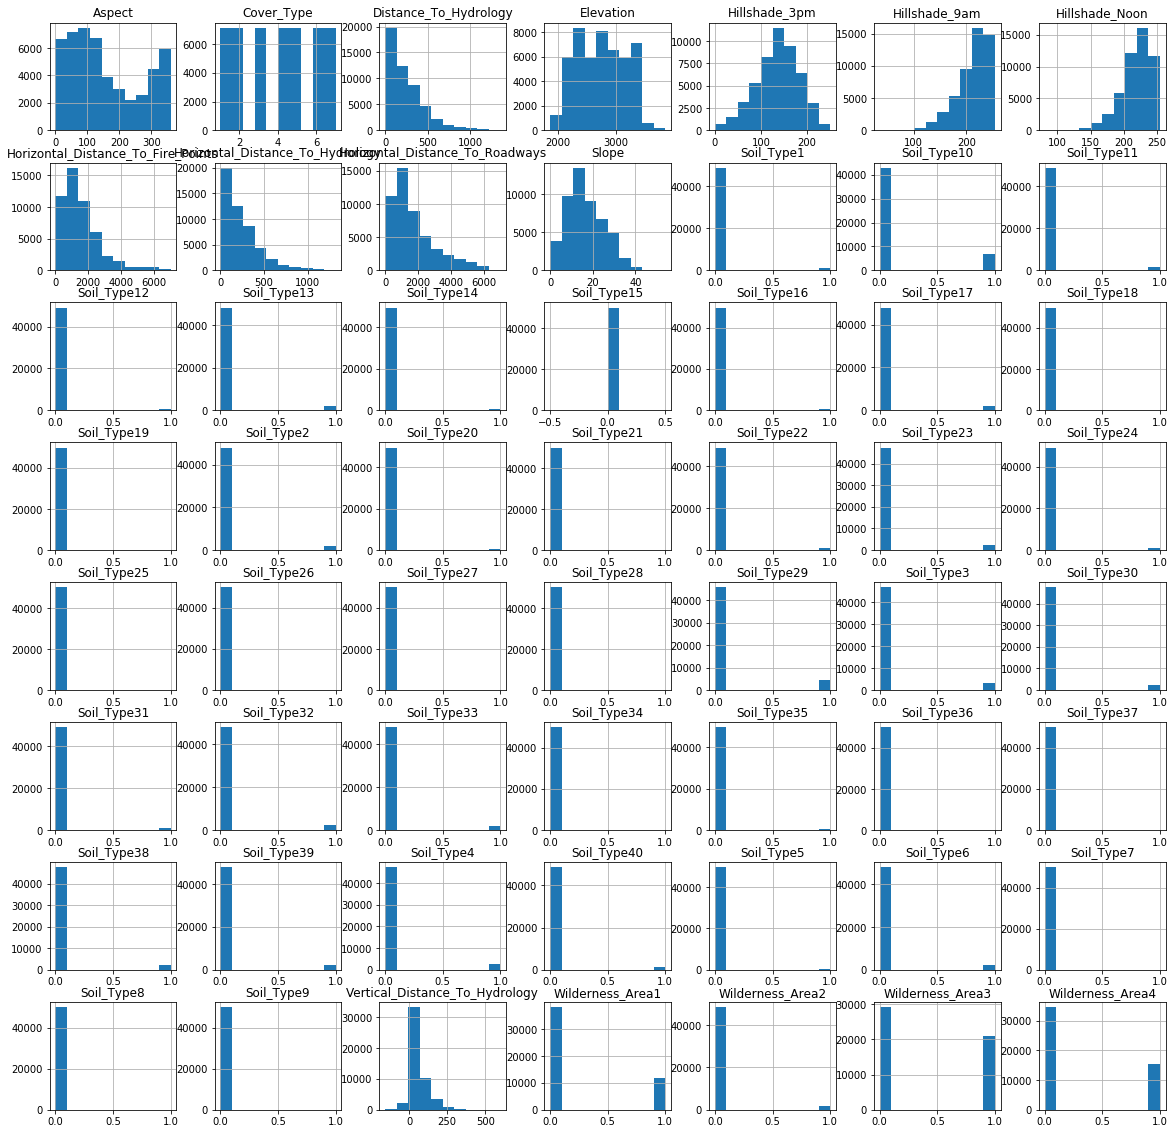

In [14]:
#look at distribution of sample data
data_sampled.hist(figsize = (20,20));

Comparing distributions the sample population looks similar, except that elevation is a bit more flat than left skewed. 

In [15]:
#Check why there is no longer Soil_Type15
data_raw.Soil_Type15.value_counts()

0    581009
1         3
Name: Soil_Type15, dtype: int64

There were only 3 data points with Soil_type15.  PCA will be run to see if it's worth reducing dimensions

### Continuous Data Exploration

In [16]:
#Check correlation of sample data
cont_data_sampled = data_sampled.loc[:,['Elevation', 'Aspect', 'Slope', 
                                        'Horizontal_Distance_To_Hydrology',
                                        'Vertical_Distance_To_Hydrology',  
                                        'Horizontal_Distance_To_Roadways','Hillshade_9am', 
                                        'Hillshade_Noon', 'Hillshade_3pm',
                                        'Horizontal_Distance_To_Fire_Points']]
print(len(cont_data_sampled))
cont_data_sampled.head()

50001


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
67445,3254,75,7,365,49,368.274354,3034,228,228,133,4708
128508,3149,341,16,216,30,218.073382,3241,186,215,167,3085
75226,2972,321,10,150,13,150.562279,4796,194,230,176,4607
526081,3097,265,21,430,60,434.165867,3290,162,244,218,1503
399807,3321,286,7,660,118,670.465510,797,201,240,179,968


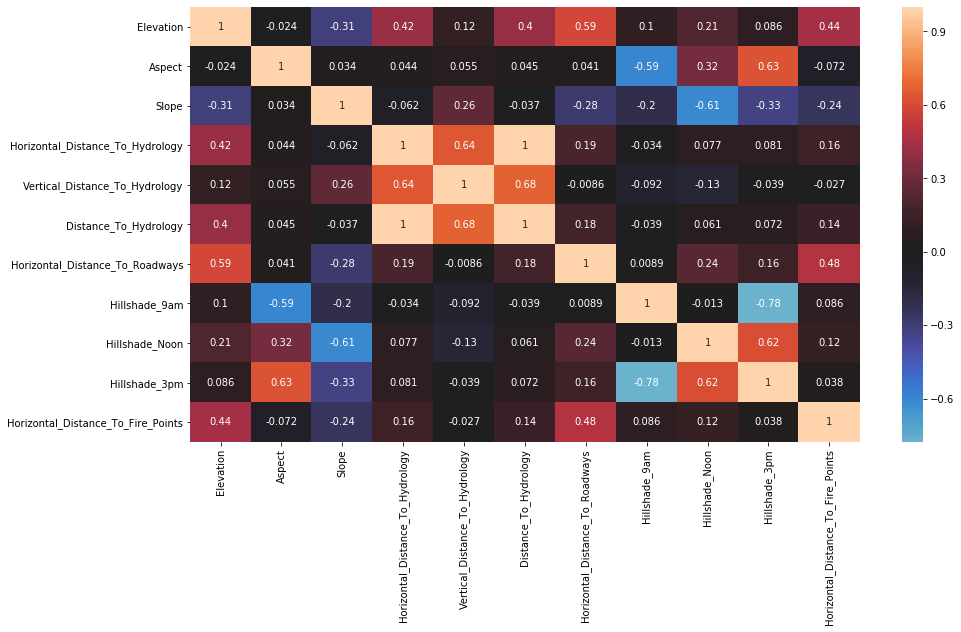

In [17]:
#check heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cont_data_sampled.corr(), center=0, annot=True)

Correlated Data:
- Hillshade_3pm and Aspect (same as before)
- Hillshade_3pm and Hillshade_Noon (same as before)
- Elevation and Horizontal_Distance_To_Roadways (more correlated now, was at 0.37 before)
- Horizontal_Distance_to_Hydrology and Vertical_Distance_to_Hydrology (makes sense)

Correlation will be fixed when we perform PCA if needed, but I want to look at Elevation and Horizontal_Distance_To_Roadways more.  

I'll now look at boxplots for the continuous features to determine which features will be strong predictors for Cover_Type as well as be able to see their distribution


In [18]:
#define continuous feature columns
cont_features = cont_data_sampled.columns
cont_features

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

In [19]:
#look at sampled data
data_sampled.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Distance_To_Hydrology
67445,3254,75,7,365,49,3034,228,228,133,4708,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,368.274354
128508,3149,341,16,216,30,3241,186,215,167,3085,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,218.073382
75226,2972,321,10,150,13,4796,194,230,176,4607,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,150.562279
526081,3097,265,21,430,60,3290,162,244,218,1503,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,434.165867
399807,3321,286,7,660,118,797,201,240,179,968,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,670.465510


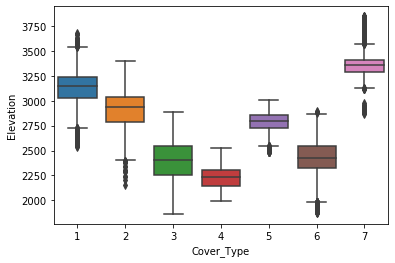

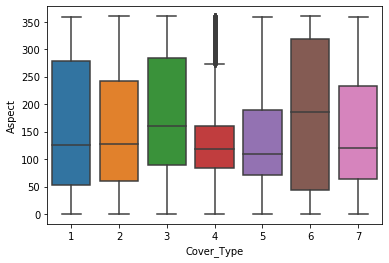

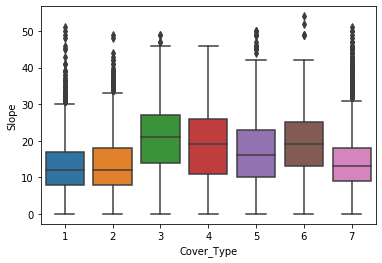

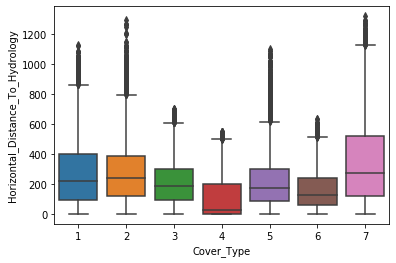

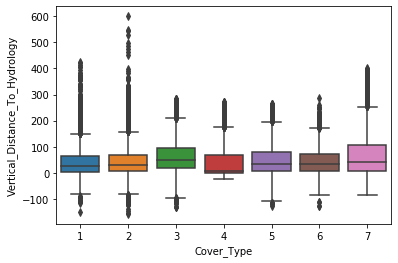

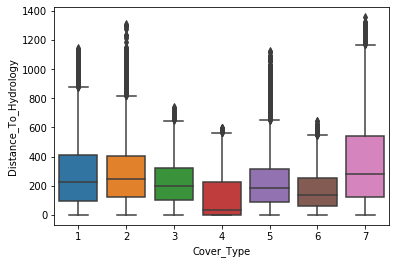

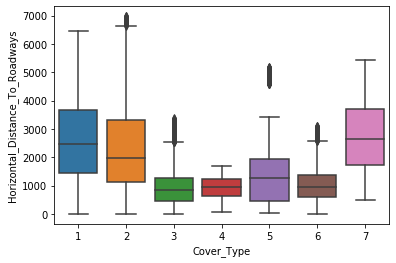

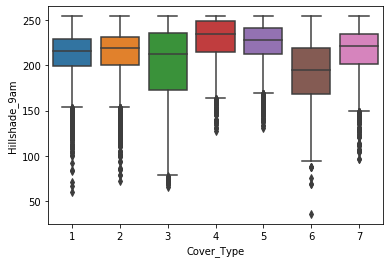

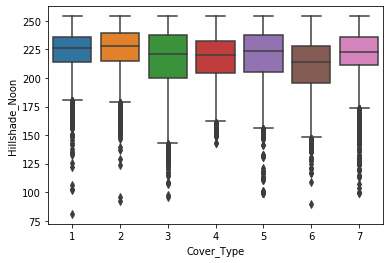

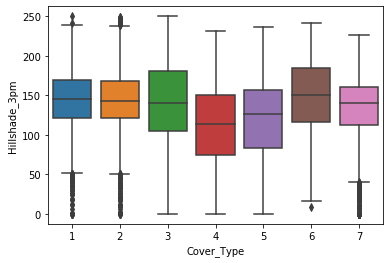

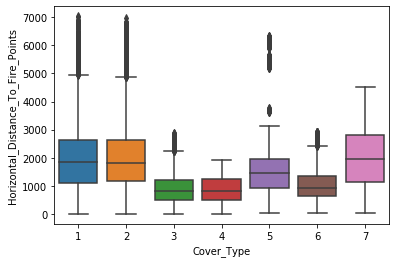

In [20]:
#create boxplots for continuous features
for feat in cont_features:
    sns.boxplot(x='Cover_Type', y=feat, data=data_sampled)
    plt.show()

* Elevation is a very strong predictor of Cover_Type, followed by Horizontal_Distance_To_Roadways
* Vertical_Distance_To_Hydrology doesn't have much variation based on cover_type.  It really is all present in the Horizontal_Distance_To_Hydrology
* The Hillshade features have a lot of outliers

### Categorical Data Exploration

I'll now look at bar charts to review the wilderness area and soil type features and how they are related to Cover_Type

In [21]:
#Review Soil Type
data_soil = data_sampled.loc[:,'Soil_Type1':'Soil_Type40']
data_soil.head()

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
67445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
128508,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
75226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
526081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
399807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


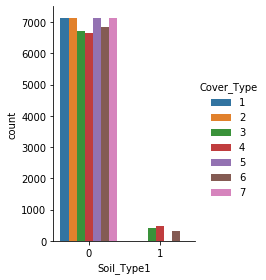

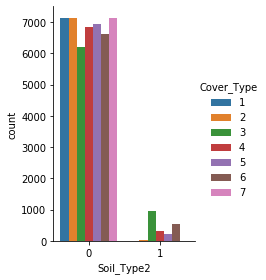

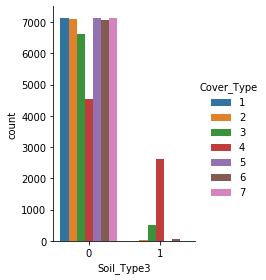

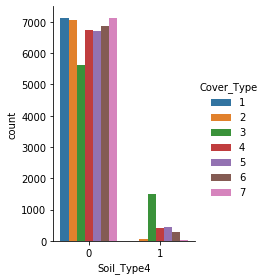

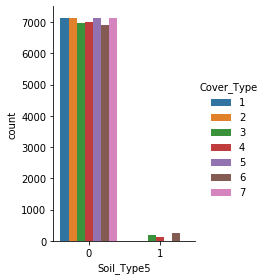

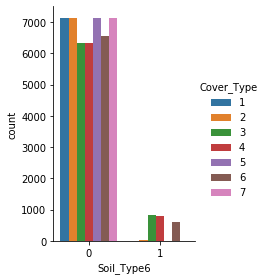

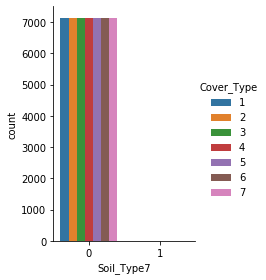

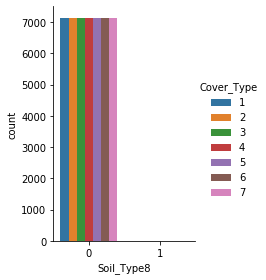

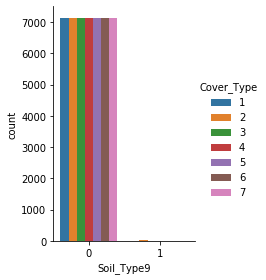

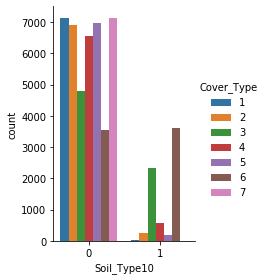

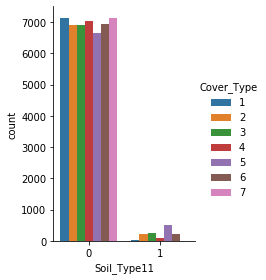

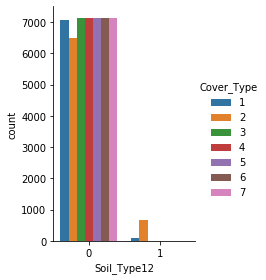

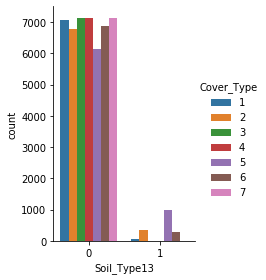

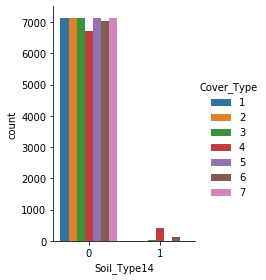

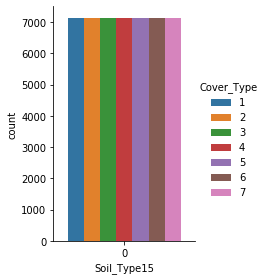

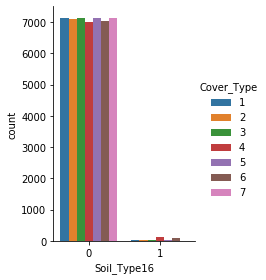

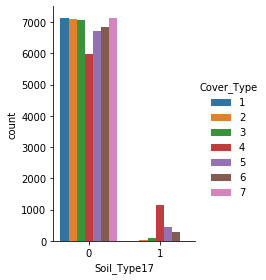

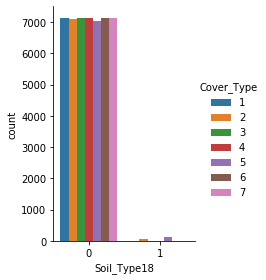

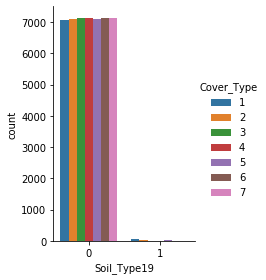

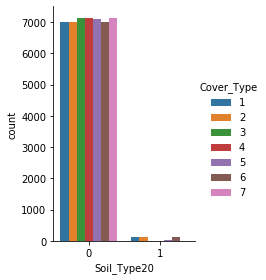

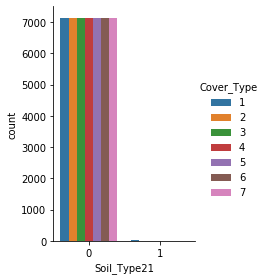

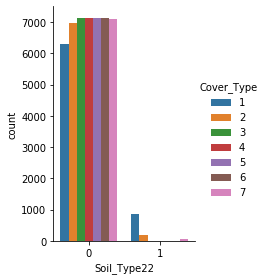

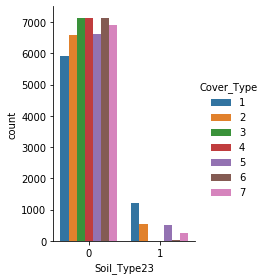

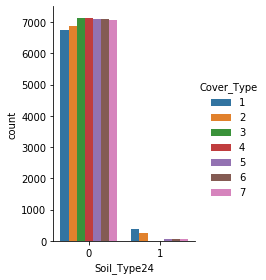

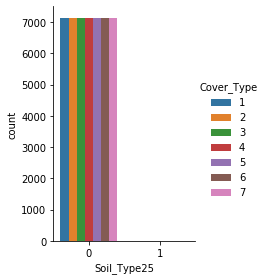

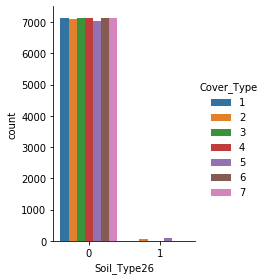

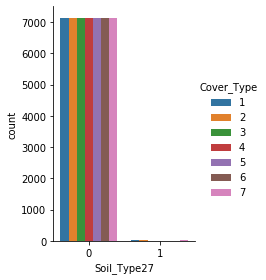

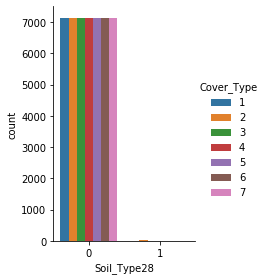

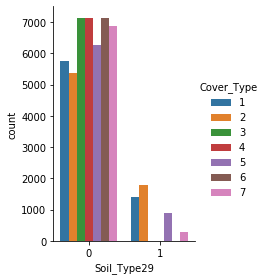

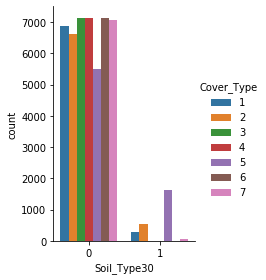

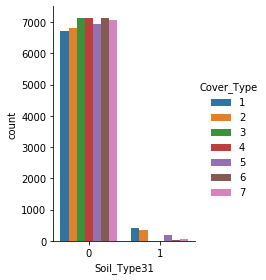

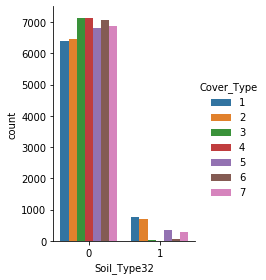

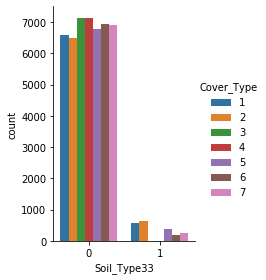

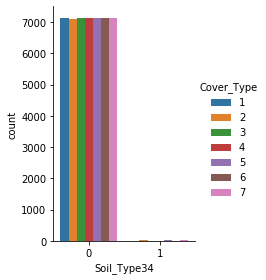

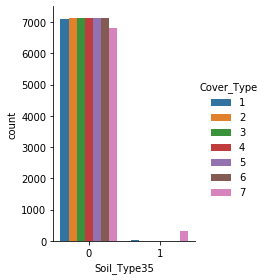

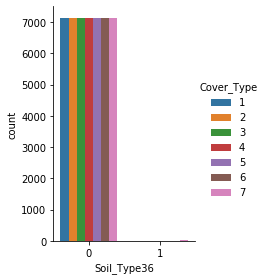

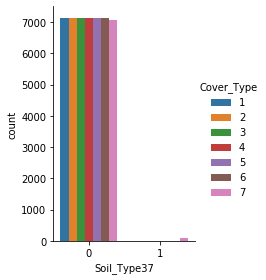

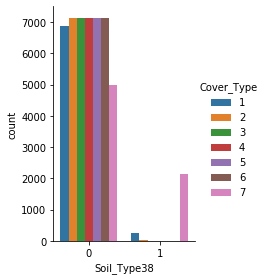

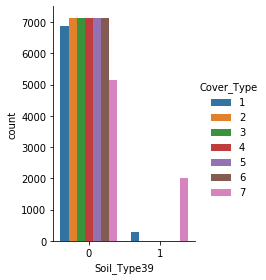

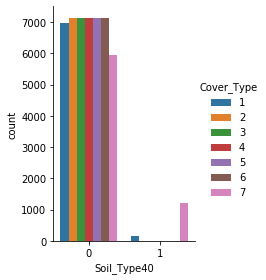

In [22]:
#create charts to look at soil types
for soil in data_soil.columns:
    sns.catplot(x=soil, hue='Cover_Type', data=data_sampled, kind="count",
                height=4, aspect=.7)
    plt.show()

There are barely any trees in our sample data for some of the Soil_Types.  If needed, PCA will help with this.

In [23]:
#Review Wilderness Area 
data_wild = data_sampled.loc[:,'Wilderness_Area1':'Wilderness_Area4']
data_wild.head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
67445,1,0,0,0
128508,1,0,0,0
75226,1,0,0,0
526081,0,0,1,0
399807,0,0,1,0


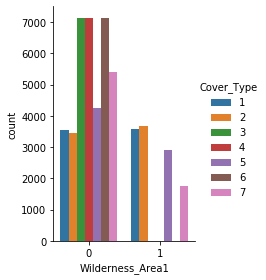

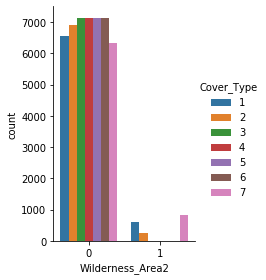

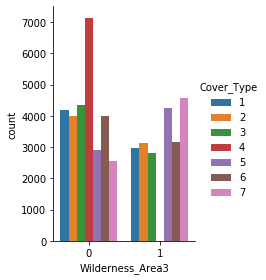

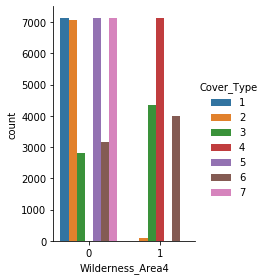

In [24]:
#create charts to look at soil types
for wild in data_wild.columns:
    sns.catplot(x=wild, hue='Cover_Type', data=data_sampled, kind="count",
                height=4, aspect=.7)
    plt.show()

Here we can see Wilderness area could be a strong prediction of cover type as some areas only have a few trees present while others have all trees.  There's also great variation within the different wilderness areas

# Feature Engineering & Modeling

## Feature engineering and selection with PCA

Determine if dimensionality reduction with PCA is needed

In [25]:
#create dataframe of features
feat = data_sampled.drop('Cover_Type', axis=1)
feat.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Distance_To_Hydrology
67445,3254,75,7,365,49,3034,228,228,133,4708,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,368.274354
128508,3149,341,16,216,30,3241,186,215,167,3085,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,218.073382
75226,2972,321,10,150,13,4796,194,230,176,4607,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150.562279
526081,3097,265,21,430,60,3290,162,244,218,1503,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,434.165867
399807,3321,286,7,660,118,797,201,240,179,968,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,670.465510


In [26]:
#perform PCA
pca_1 = PCA(n_components=20)
pca_2 = PCA(n_components=35)
pca_3 = PCA(n_components=52)

principalComponents = pca_1.fit_transform(feat)
principalComponents = pca_2.fit_transform(feat)
principalComponents = pca_3.fit_transform(feat)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

0.9999998717230746
0.9999999863967965
1.0


Using PCA I can see that I maintain 99% of my explained variance even as I decrease the number of features. Therefore, I'll just keep all my features for this project.

## Train/Test Split

Create my train/test/split sets for modeling

In [0]:
#Build Train/Validation and Test Sets
y = data_sampled['Cover_Type']
X = data_sampled.drop('Cover_Type', axis=1)

In [0]:
# Create Train/Validation/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Create Functions

In this section I'll define the functions needed while exploring multiple models.

In [0]:
#Define a function to get metrics
def get_metrics(y_val, y_pred):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_val, y_pred, pos_label=None, average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_val, y_pred, pos_label=None,average='weighted')
    # harmonic mean of precision and recall
    f1 = f1_score(y_val, y_pred, pos_label=None, average='weighted')
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy, precision, recall, f1

In [0]:
#Define a function to plot Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

In [0]:
#Define a function to compute ROC curve and ROC area for each tree type class
def roc(y_val, y_score): 
  # Binarize the output
  y_val_bin = label_binarize(y_val, classes=[1, 2, 3, 4, 5, 6, 7])
  n_classes = y_val_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    plt.plot(fpr[i], tpr[i], color=color[i], lw=2, label="Type" + str(i+1))
    print('AUC for Cover Type {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

  plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic Curves')
  plt.legend()
  plt.show()
  return plt

In [0]:
#Define a function to review feature importance (pipeline)
def plot_feature_importances_pipe(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.named_steps['clf'].feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [0]:
#Define a function to review feature importance (Grid Search)
def plot_feature_importances_gs(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.best_estimator_.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [0]:
#Define a function to find the optimal number of neighbors in KNN
def find_best_k(X_train, y_train, X_val, y_val, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_val)
        accuracy, precision, recall, f1 = get_metrics(y_val, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

## Baseline Model: Random Forest (with default parameters)

I'll first run a random forest classifier on my data since it is a strong model to start out with that generally does pretty well.  

A random forest algorithm is an ensemble ML model that constructs a multitude of decision trees and outputs the class that is the mode of the classes or mean prediction of the individual trees. 

At this point, I am not standardizing my data for the random forest classifier.  I'll decide if that makes my model better after this baseline phase.

accuracy = 0.910, precision = 0.908, recall = 0.910, f1 = 0.908


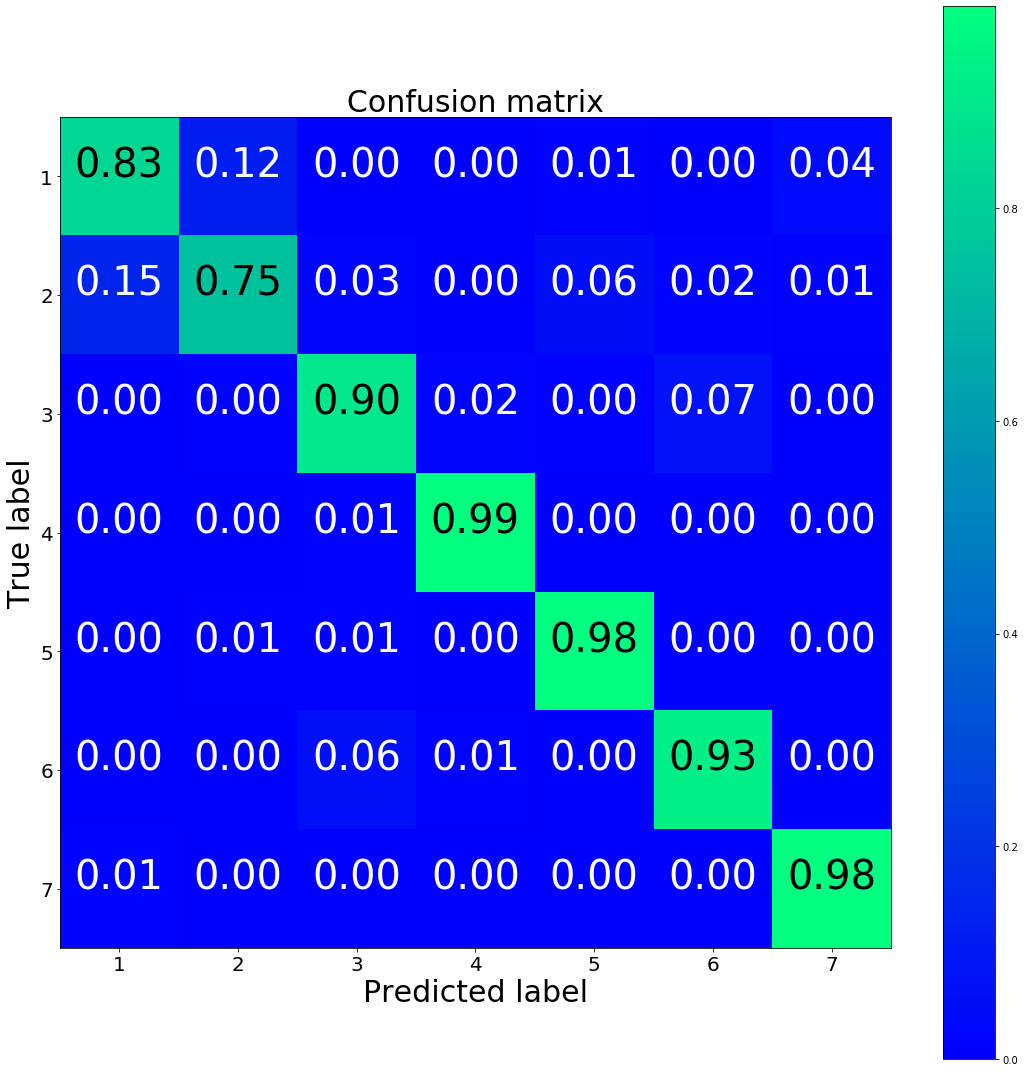

[[ 936  130    0    0   13    0   45]
 [ 166  848   30    0   63   19    8]
 [   0    5 1010   23    5   82    0]
 [   0    0    8 1204    0    4    0]
 [   1   11    7    0 1138    1    0]
 [   0    3   67   13    0 1055    0]
 [  16    1    0    0    0    0 1088]]
AUC for Cover Type 1: 0.984370050865458
AUC for Cover Type 2: 0.9768715666132891
AUC for Cover Type 3: 0.9938887111111111
AUC for Cover Type 4: 0.9995791180486593
AUC for Cover Type 5: 0.9986610561910864
AUC for Cover Type 6: 0.9952373915283937
AUC for Cover Type 7: 0.9993995255267277


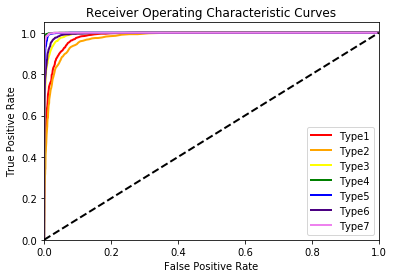

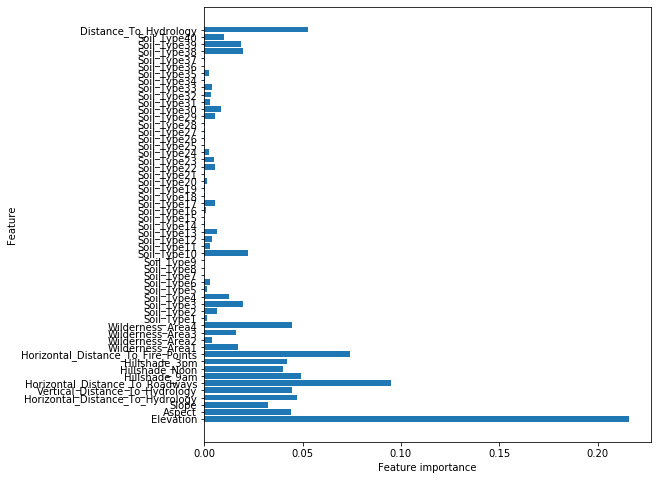

In [35]:
#Construct Pipeline. Random_state=123 to control randomness of bootstrapping 
#of samples used when building trees
pipe_rf_base = Pipeline([('clf', RandomForestClassifier(random_state=123))])
# Fit pipeline
rf_base = pipe_rf_base.fit(X_train, y_train)
#prediction
y_pred_rf_base = rf_base.predict(X_val)

#View metrics 
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_rf_base)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix 
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_rf_base)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

#Plot roc curve 
y_score_rf_base = rf_base.predict_proba(X_val)
roc(y_val, y_score_rf_base)

#Plot feature importance 
plot_feature_importances_pipe(rf_base)

Results:
* This is a very strong baseline model with almost 91% accuracy!  
* We see mostly true positives in our confusion matrix here, however we see larger misclassification for Cover_Type's 1 with 2 and 6 with 3
* The ROC Curve is showing a very strong model with high AUC for each Cover_Type
* Again we see that Elevation is a very important feature for predicting tree type, followed by Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points

## Model #1: Support Vector Machine

I'll now look at a Nonlinear Support Vector Machine using a 3rd degree polynomial kernel to begin with (assuming my data is more complicated then having a linear kernel).  Since SVM is a distance-based classifier, if data is in different scales, then larger scaled features have a larger impact on the distance between points.  Therefore we have to scale it before running the model.  

In [0]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_val = scaler.transform(X_val)

In [37]:
#construct pipeline, include scaler since SVMs are sensitive to feature scales
#coef0 controls how much the model is influenced by high degree polynomials vs low
poly_kernel_svm_clf = Pipeline([('scaler', StandardScaler()),
                          ('clf', SVC(kernel="poly", degree=3, coef0=1, C=5))])
# Fit pipeline
model_svm = poly_kernel_svm_clf.fit(scaled_data_train, y_train)
#prediction
y_pred_svm = model_svm.predict(scaled_data_val)

#View metrics
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_svm)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

accuracy = 0.825, precision = 0.822, recall = 0.825, f1 = 0.822


I'll perform a grid search on the hyperparameters to see if I can increase accuracy 

In [0]:
#Parameters for grid search
param_grid = {
    'kernel': ['rbf', 'poly' ],
    'degree': [3,4,5],
    'gamma': ['scale', 'auto'],
    'coef0': [1,2,3],
    'C': [5,10,15]
}

Running the Grid Search below produces the following results:

Grid Search found the following optimal parameters: 
* C: 15
* coef0: 3
* degree: 5
* gamma: 'scale'
* kernel: 'poly'
* accuracy = 0.875, precision = 0.873, recall = 0.875, f1 = 0.873

These results are still less than I saw using the baseline random forest model, so I will move on to looking at KNN's.

Grid Search found the following optimal parameters: 
C: 15
coef0: 3
degree: 5
gamma: 'scale'
kernel: 'poly'
accuracy = 0.875, precision = 0.873, recall = 0.875, f1 = 0.873


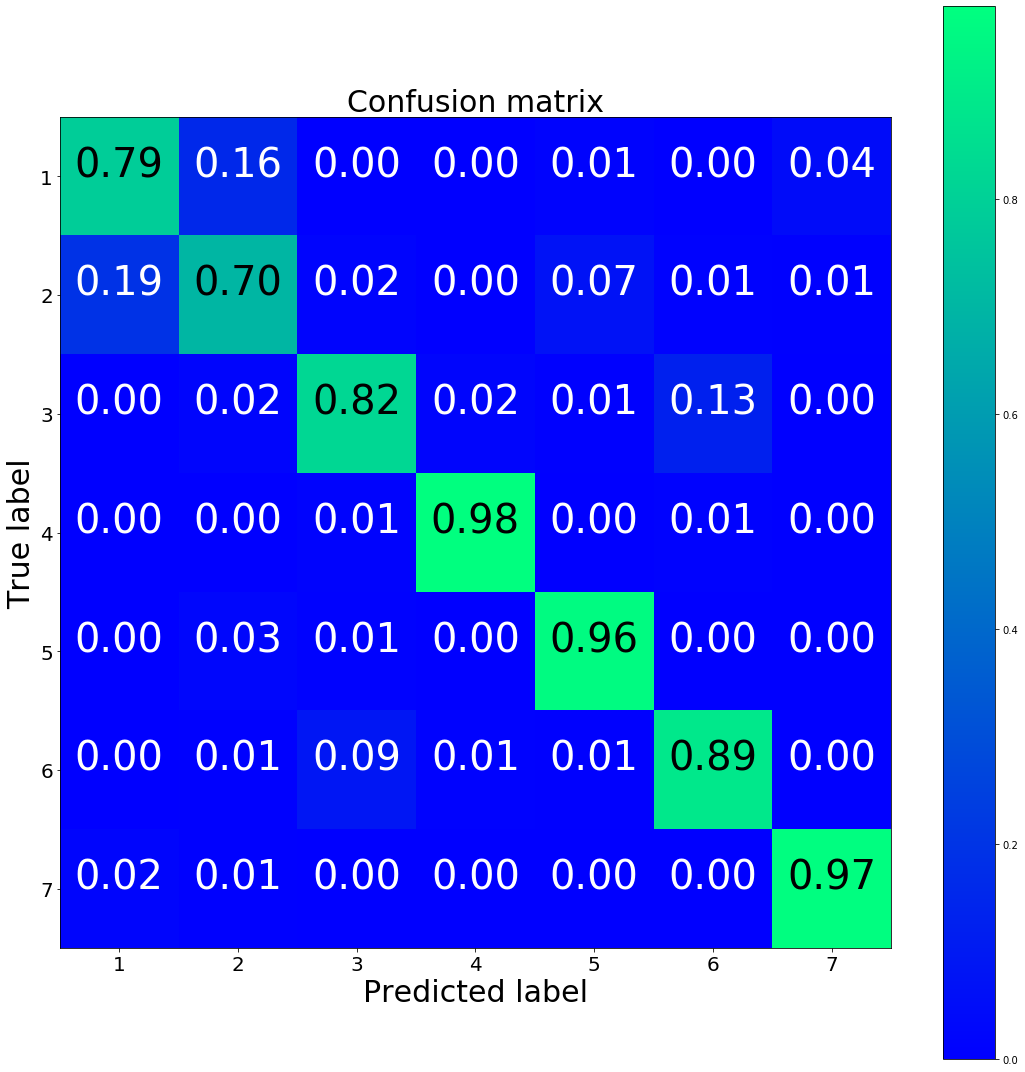

[[ 884  177    0    0   14    0   49]
 [ 217  793   21    0   82   13    8]
 [   0   22  928   25    7  143    0]
 [   0    0   15 1191    0   10    0]
 [   3   29   10    0 1114    2    0]
 [   4    8   97   10    6 1013    0]
 [  23    6    0    0    0    0 1076]]
AUC for Cover Type 1: 0.9419564207030903
AUC for Cover Type 2: 0.9164975178665828
AUC for Cover Type 3: 0.9342500202020201
AUC for Cover Type 4: 0.9948666221217105
AUC for Cover Type 5: 0.9846543673410042
AUC for Cover Type 6: 0.9631379662018841
AUC for Cover Type 7: 0.9964034532204136


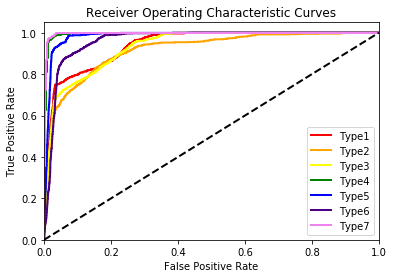

AttributeError: ignored

<Figure size 576x576 with 0 Axes>

In [40]:
#Perform grid search
grid_svm = GridSearchCV(SVC(), param_grid, cv=3, n_jobs=1)
#Fit grid
grid_svm.fit(scaled_data_train, y_train)
#Best Parameters
best_parameters = grid_svm.best_params_
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
#prediction
y_pred_svm2 = grid_svm.predict(scaled_data_val)

#View metrics
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_svm2)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix 
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_svm2)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

#Plot roc curve 
y_score_svm = model_svm.decision_function(scaled_data_val)
roc(y_val, y_score_svm)

## Model #2: KNN

Similar to SVM, since KNN is a distance-based classifier, if data is in different scales, then larger scaled features have a larger impact on the distance between points.  Therefore we have to scale it before running the model.  I'll begin by looking for the best number of neighbors for the model.

In [41]:
#Find the optimal value of K 
find_best_k(scaled_data_train, y_train, scaled_data_val, y_val)

Best Value for k: 1
F1-Score: 0.8730451115946635


Since the optimal value of K is 1 this means that the object is simply assigned to the class of that single nearest neighbor.  I'll dive right into a grid search for this model to find the best fit on the data.

In [0]:
#Parameters for grid search
param_grid = {
    'n_neighbors': [1],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

Grid Search found the following optimal parameters: 
metric: 'euclidean'
n_neighbors: 1
weights: 'uniform'
accuracy = 0.875, precision = 0.872, recall = 0.875, f1 = 0.873


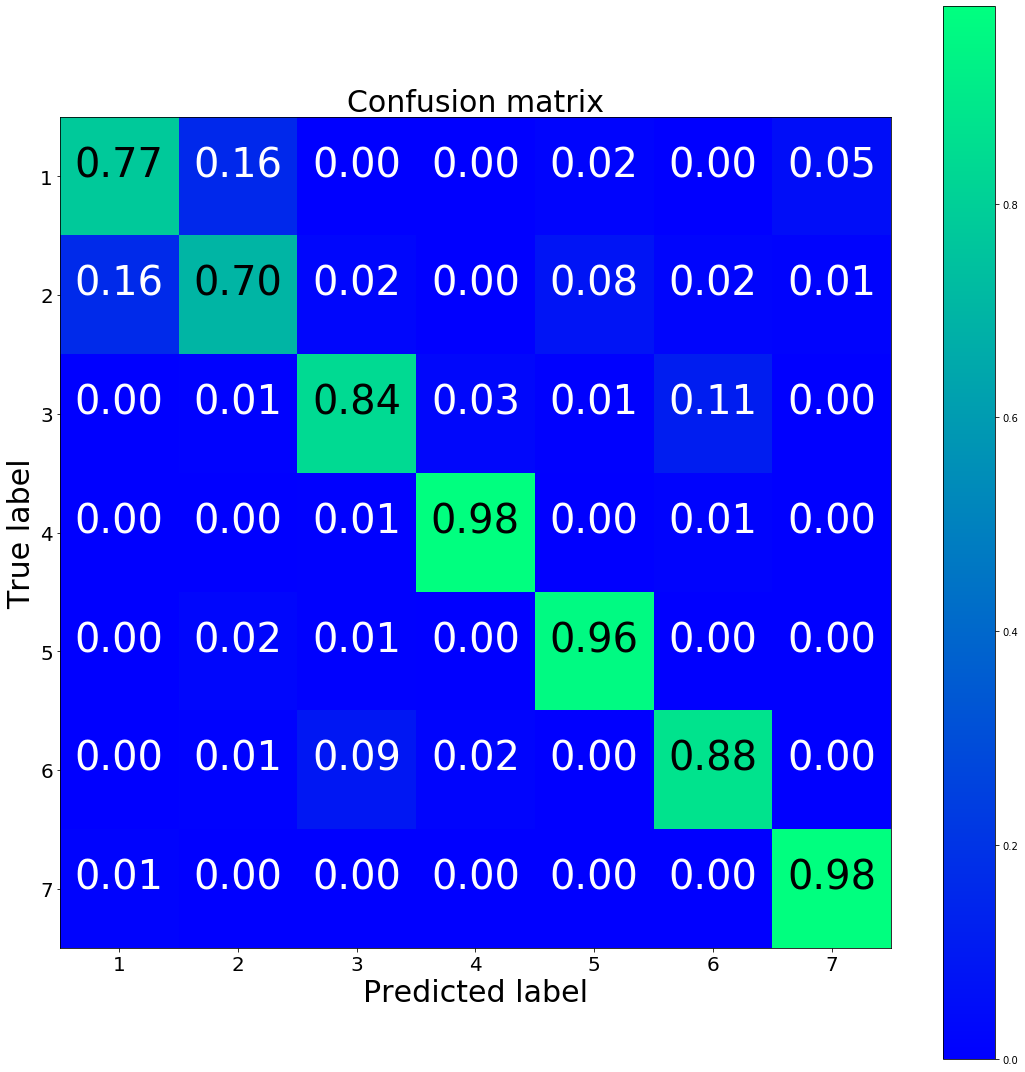

[[ 869  175    0    0   21    2   57]
 [ 187  790   28    1   91   22   15]
 [   1   11  947   34    6  126    0]
 [   0    0    7 1194    0   15    0]
 [   3   28    8    0 1115    4    0]
 [   1   10  105   20    4  998    0]
 [  16    1    0    0    0    0 1088]]
AUC for Cover Type 1: 0.8714407635822367
AUC for Cover Type 2: 0.8319394290605088
AUC for Cover Type 3: 0.9101252525252526
AUC for Cover Type 4: 0.9869002917080437
AUC for Cover Type 5: 0.9725179842676469
AUC for Cover Type 6: 0.9261743823374086
AUC for Cover Type 7: 0.9870865175433703


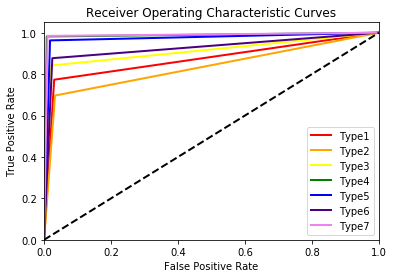

AttributeError: ignored

<Figure size 576x576 with 0 Axes>

In [43]:
#Perform grid search
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, n_jobs=1)
#Fit grid
grid_knn.fit(scaled_data_train, y_train)
#Best parameters
best_parameters = grid_knn.best_params_
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
#Prediction
y_pred_knn = grid_knn.predict(scaled_data_val)

#View metrics for KNN classifier
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_knn)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix for SVM model
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_knn)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

# Compute ROC curve and ROC area for each tree type class
y_score_knn = grid_knn.predict_proba(scaled_data_val)
roc(y_val, y_score_knn)

Results:

* KNN Classifier gives a final F1-Score of 87%, this is lower than Random Forest.  Next will try XGBoost.

## Model #3: XGBoost

I'll now look at a Boosting ensemble method with XGBoost, which is known to be a stronger model than Adaboost and Gradient Boosting.

In [44]:
#Construct pipeline, without scaler
pipe_xgb = Pipeline([('clf', XGBClassifier())])
#Fit pipeline
model_xgb = pipe_xgb.fit(X_train, y_train)
#Prediction
y_pred_xgb = model_xgb.predict(X_val)

#View metrics for XGBoost classifier
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_xgb)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

accuracy = 0.761, precision = 0.757, recall = 0.761, f1 = 0.753


I'll perform a grid search on the model to see if I can improve results

In [0]:
#Parameters for grid search
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7
accuracy = 0.893, precision = 0.891, recall = 0.893, f1 = 0.891


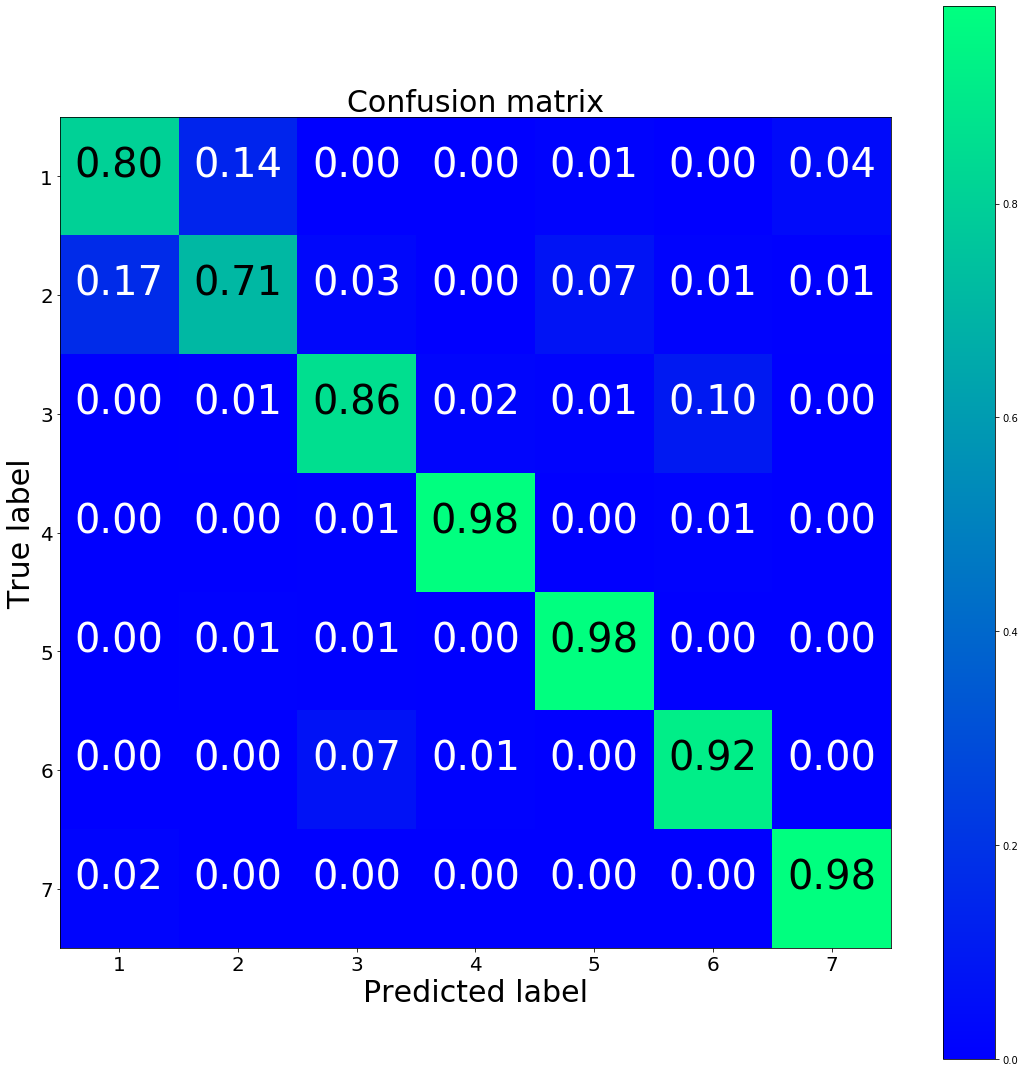

[[ 904  157    0    0   16    0   47]
 [ 190  803   31    0   85   17    8]
 [   0    7  969   25   13  111    0]
 [   0    0    9 1196    0   11    0]
 [   0    9    7    0 1140    2    0]
 [   0    4   79   10    1 1044    0]
 [  19    1    0    0    0    0 1085]]
AUC for Cover Type 1: 0.9814357639859308
AUC for Cover Type 2: 0.9692623750906109
AUC for Cover Type 3: 0.9908357171717171
AUC for Cover Type 4: 0.9995205679384931
AUC for Cover Type 5: 0.9972677140429502
AUC for Cover Type 6: 0.9940473476864256
AUC for Cover Type 7: 0.9992086862077905


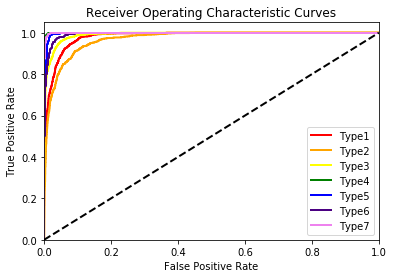

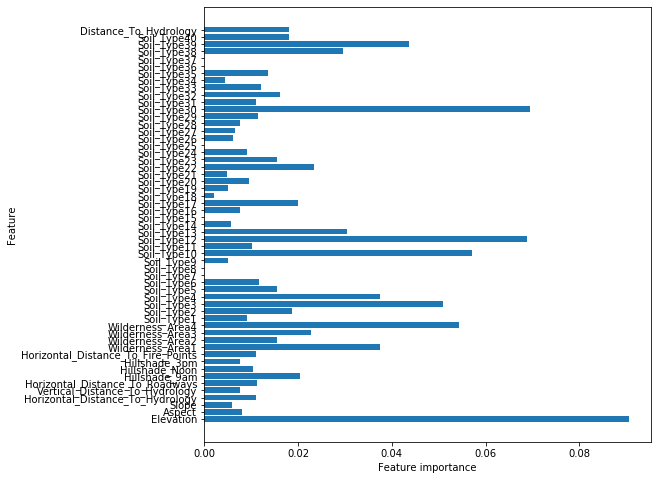

In [48]:
#Construct grid search
grid_xgb = GridSearchCV(XGBClassifier(), param_grid, cv=3, n_jobs=1)
#Fit grid
grid_xgb.fit(X_train, y_train)
#Best parameters
best_parameters = grid_xgb.best_params_
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
#Prediction
y_pred_xgb2 = grid_xgb.predict(X_val)

#View metrics for XGBoost classifier
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_xgb2)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix for SVM model
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_xgb2)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

# Compute ROC curve and ROC area for each tree type class
y_score_xgb = grid_xgb.predict_proba(X_val)
roc(y_val, y_score_xgb)

#Plot feature importance 
plot_feature_importances_gs(grid_xgb)

Results:
* The metrics for XGBoost are lower then we've seen in the Random Forest models, but higher then the SVM and KNN classifiers.  Around 89% F1-Score.  

Grid Search found the following optimal parameters: 
* learning_rate: 0.2
* max_depth: 6
* min_child_weight: 1
* n_estimators: 100
* subsample: 0.7
* accuracy = 0.893, precision = 0.891, recall = 0.893, f1 = 0.891

I can keep trying to tune the parameters to get higher accuracy, but the simpler way to go is with the baseline Random Forest Model that gave the highest accuracy and was quick to run.  I'll look into tuning the parameters for the Random Forest Classifier.

## Final Model: Random Forest 

As mentioned, it appears my baseline model using a Random Forest Classifier has been the strongest model.  
* I'll look into reducing dimensionality using an ExtraTreesClassifier, which is used for ensemble methods.  This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
* I'll also perform a grid search to see if I can improve results.

### Feature Engineering: ExtraTreesClassifier()

In [49]:
#Construct ExtraTreesClassifier
clf = ExtraTreesClassifier()
#Fit classifier
clf = clf.fit(X_train, y_train)
#Create model
model = SelectFromModel(clf, prefit=True)
#Transforem X_train
train_features = model.transform(X_train)
val_features = model.transform(X_val)
#See new shape
print(train_features.shape)

(32000, 18)


In [50]:
#Fit baseline pipeline with new features
rf_base_feat = pipe_rf_base.fit(train_features, y_train)
#Prediction with new features
y_pred_rf_base_feat = rf_base_feat.predict(val_features)

#View metrics 
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_rf_base_feat)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

accuracy = 0.903, precision = 0.901, recall = 0.903, f1 = 0.901


It looks like this made my fit slightly worse, so I'll go back to the original features and perform a grid search.

### Grid Search

In [0]:
#Parameters for grid search
param_grid = {'criterion': ['gini', 'entropy'],
   'min_samples_leaf': [1, 2],
   'min_samples_split': [2, 4],
   'n_estimators': [100, 500, 800]
}

Grid Search found the following optimal parameters: 
criterion: 'entropy'
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 500
accuracy = 0.909, precision = 0.908, recall = 0.909, f1 = 0.908


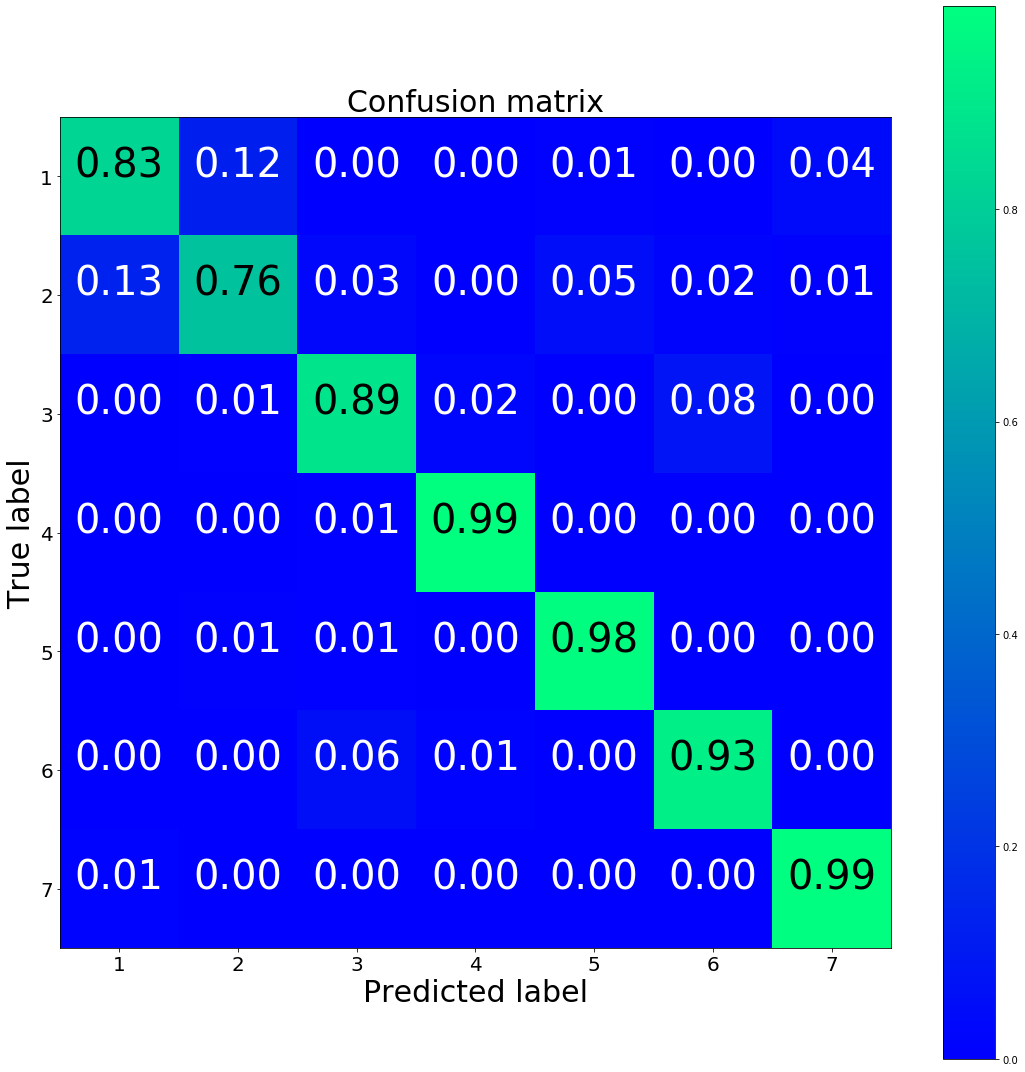

[[ 930  139    0    0   10    0   45]
 [ 152  861   33    0   58   21    9]
 [   0    6  998   28    4   89    0]
 [   0    0    7 1205    0    4    0]
 [   1   12    6    0 1137    2    0]
 [   0    4   63   15    0 1056    0]
 [  15    1    0    0    0    0 1089]]
AUC for Cover Type 1: 0.9849266829386447
AUC for Cover Type 2: 0.9774727062934656
AUC for Cover Type 3: 0.99392
AUC for Cover Type 4: 0.9996296069117739
AUC for Cover Type 5: 0.9987673916917708
AUC for Cover Type 6: 0.9957149841797034
AUC for Cover Type 7: 0.9994295164375784


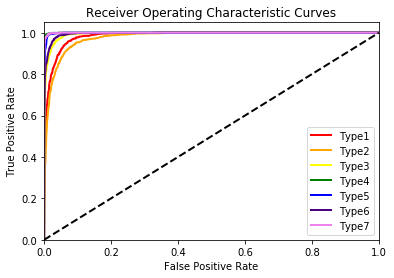

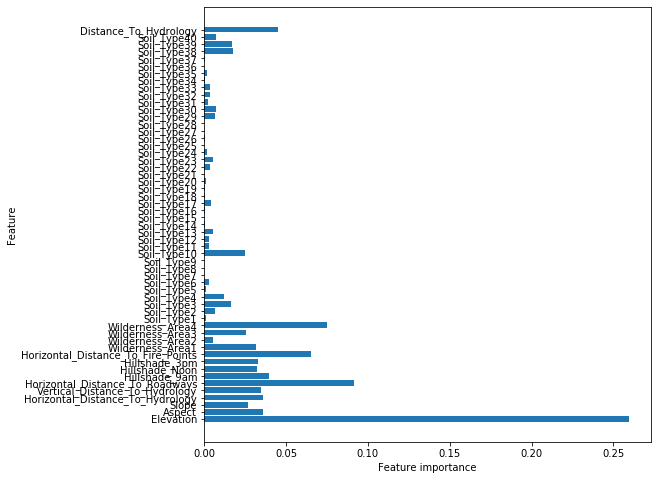

In [53]:
#Construct grid search
grid_rf = GridSearchCV(RandomForestClassifier(random_state=123), param_grid, cv=3, n_jobs=1)
# Fit grid 
grid_rf.fit(X_train, y_train)
#Best parameters
best_parameters = grid_rf.best_params_
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
#Prediction
y_pred_rf2 = grid_rf.predict(X_val)

#View metrics for XGBoost classifier
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_rf2)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix for SVM model
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_rf2)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

# Compute ROC curve and ROC area for each tree type class
y_score_rf = grid_rf.predict_proba(X_val)
roc(y_val, y_score_rf)

#Plot feature importance 
plot_feature_importances_gs(grid_rf)

Results: 
* The Feature Importance for Random Forest mostly involves Elevation, where I see more of a mix for XGBoost with some of the soil times being important features to predict Cover_Tree


Grid Search found the following optimal parameters: 
* criterion: 'entropy'
* min_samples_leaf: 1
* min_samples_split: 2
* n_estimators: 500
* accuracy = 0.909, precision = 0.908, recall = 0.909, f1 = 0.908

The baseline model was actually better then what I'm seeing here after using Grid Search

### Adding Scaler

accuracy = 0.911, precision = 0.909, recall = 0.911, f1 = 0.909


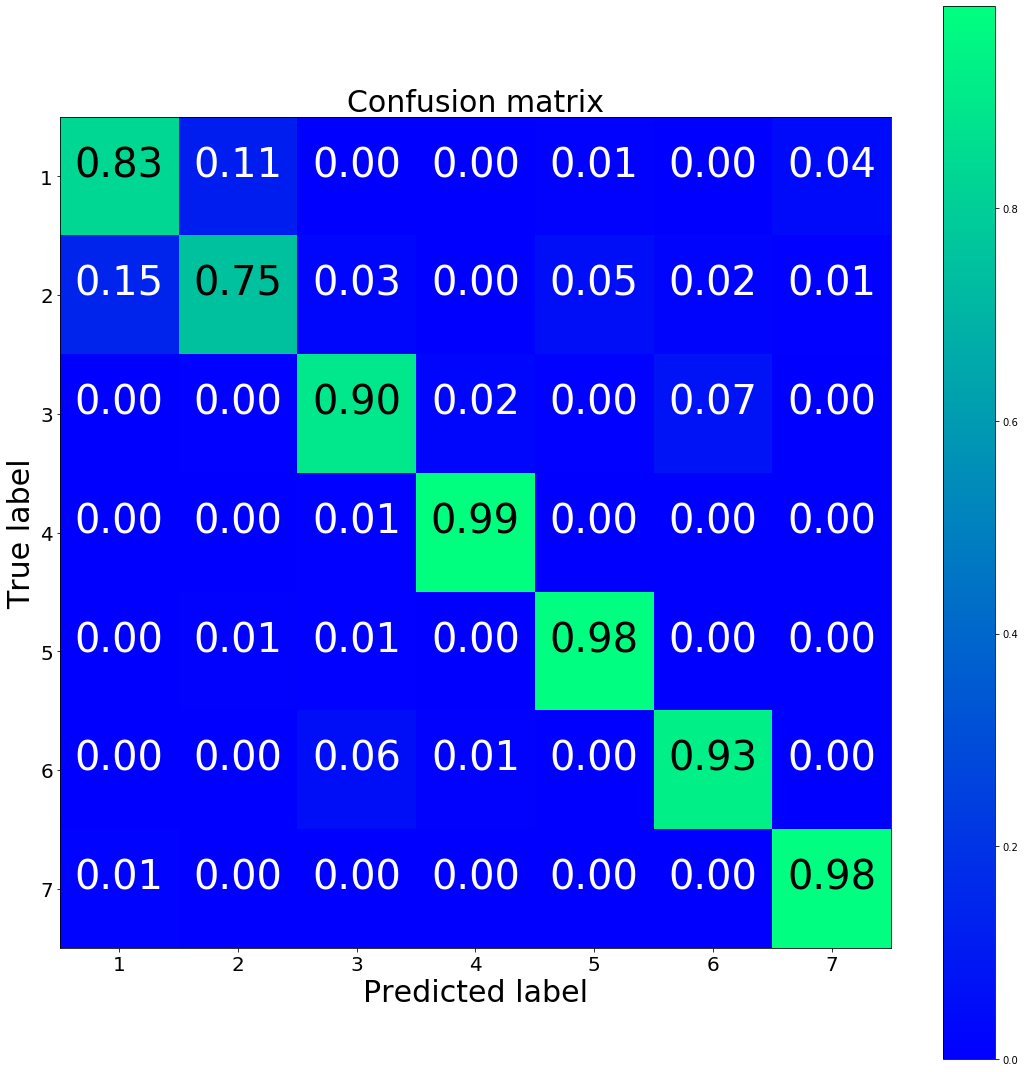

[[ 938  128    0    0   13    0   45]
 [ 165  850   30    0   62   19    8]
 [   0    5 1012   23    5   80    0]
 [   0    0    8 1204    0    4    0]
 [   1   11    7    0 1138    1    0]
 [   0    3   66   13    1 1055    0]
 [  16    1    0    0    0    0 1088]]
AUC for Cover Type 1: 0.9843605407637893
AUC for Cover Type 2: 0.9768892906333435
AUC for Cover Type 3: 0.9938804363636364
AUC for Cover Type 4: 0.9995777846092974
AUC for Cover Type 5: 0.9986552503358561
AUC for Cover Type 6: 0.9952301562462382
AUC for Cover Type 7: 0.9993995911523532


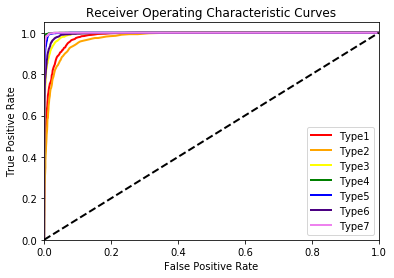

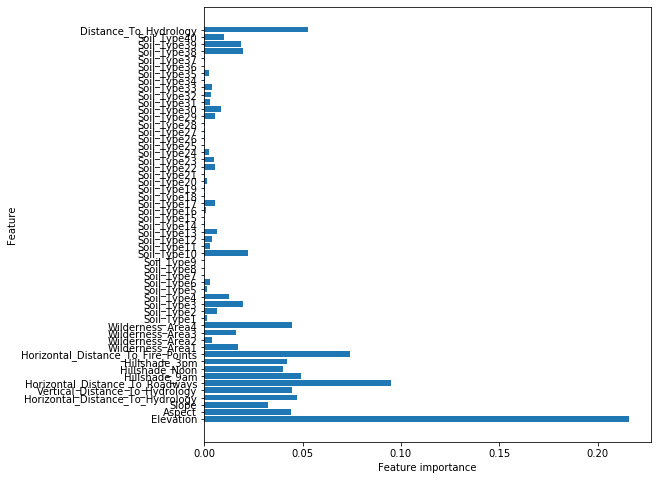

In [54]:
#Look at model using the Standard Scaler
# Fit the rf pipeline
model_rf_ss = pipe_rf_base.fit(scaled_data_train, y_train)
#prediction
y_pred_rf_ss = model_rf_ss.predict(scaled_data_val)

#View metrics for XGBoost classifier
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_rf_ss)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix for SVM model
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_rf_ss)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

# Compute ROC curve and ROC area for each tree type class
y_score_rf_ss = model_rf_ss.predict_proba(scaled_data_val)
roc(y_val, y_score_rf_ss)

#Plot feature importance 
plot_feature_importances_pipe(model_rf_ss)

# Final Model on Test Data

accuracy = 0.910, precision = 0.908, recall = 0.910, f1 = 0.908


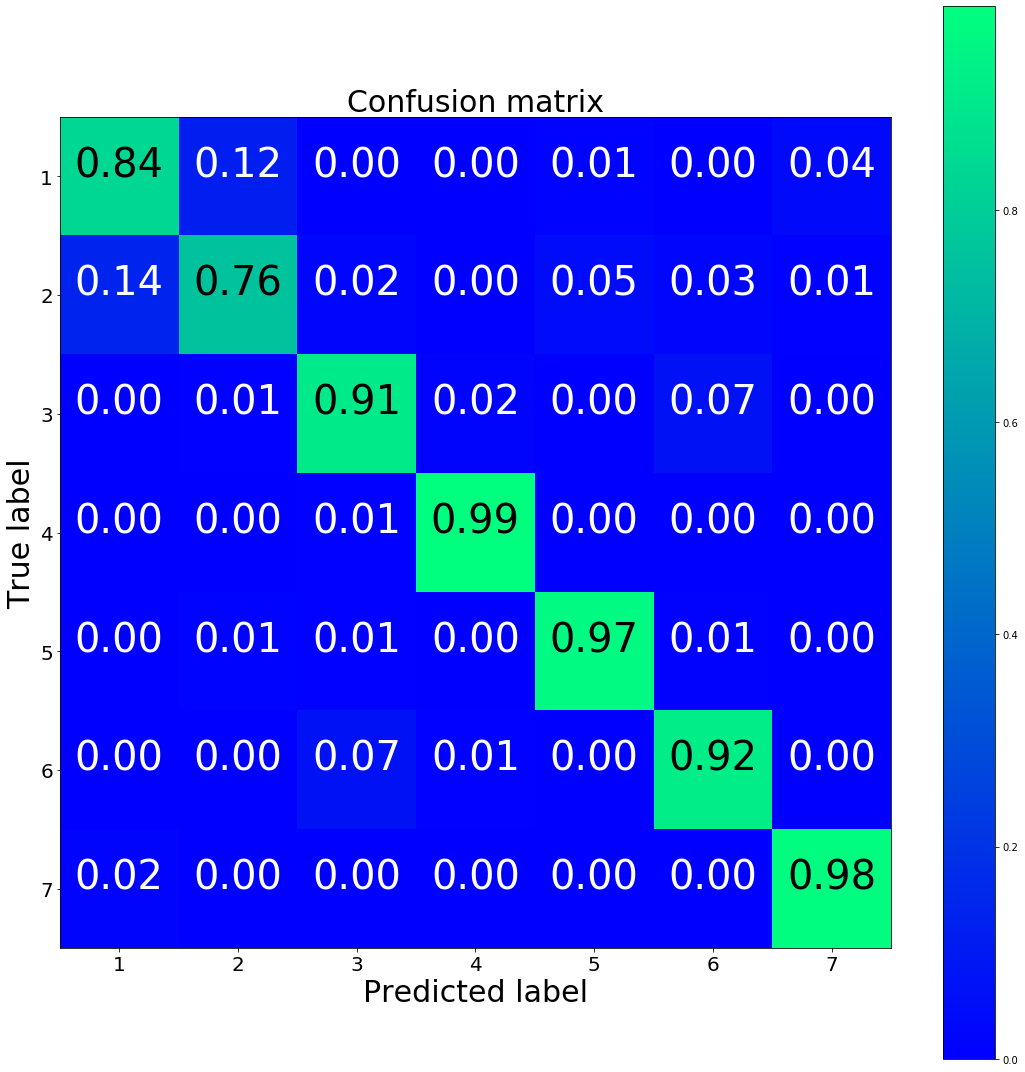

[[1226  171    0    0   18    0   53]
 [ 199 1059   28    0   65   37   10]
 [   0    8 1346   28    4   98    0]
 [   0    0    8 1382    0    3    0]
 [   2   18    9    0 1430   12    0]
 [   0    3   95   10    1 1271    0]
 [  25    0    0    0    0    0 1382]]
AUC for Cover Type 1: 0.9838264554569516
AUC for Cover Type 2: 0.9747937431414699
AUC for Cover Type 3: 0.9932034219178577
AUC for Cover Type 4: 0.9996162937630264
AUC for Cover Type 5: 0.9986759252544105
AUC for Cover Type 6: 0.9943323851935535
AUC for Cover Type 7: 0.9992858358561261


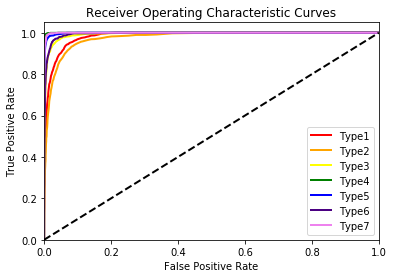

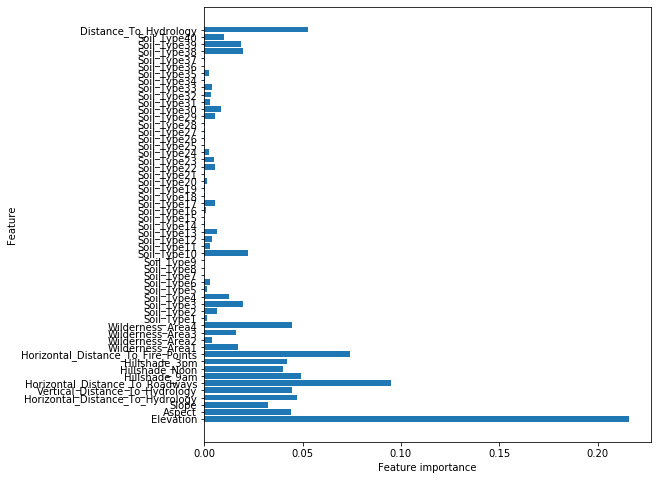

In [55]:
#Transform the training and test sets
scaled_data_test = scaler.fit_transform(X_test)

#Prediction
y_pred_rf_final = rf_base.predict(scaled_data_test)

#View metrics 
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_rf_final)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix 
class_names = list(set(y))
cm = confusion_matrix(y_test, y_pred_rf_final)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

#Plot roc curve 
y_score_rf_final= rf_base.predict_proba(scaled_data_test)
roc(y_test, y_score_rf_final)

#Plot feature importance 
plot_feature_importances_pipe(rf_base)

# Conclusion

The final model we'll use to predict tree cover type is a Random Forest Classifier with n_estimators=1000 and max_depth=30.  We'll also perform a MinMaxScaler on the data. This gives an overall accuracy score of 90.4%

The overall accuracy of the random forest classifier can also be quantified by the AUC values above.  We're close to perfect for each tree cover type ranging from 97.5% to 99.9% (almost perfect predictions!)